<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Mapping_crimes_in_NYC_with_folium_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 15.5 MB/s 
     |████████████████████████████████| 16.7 MB 283 kB/s 
     |████████████████████████████████| 6.3 MB 20.0 MB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
crimes = pd.read_csv('NYC_crime.csv')
crimes.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,749595529,34,MANHATTAN,1/1/16,0:01:00,1/1/18,0:01:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,175,"SEXUAL ABUSE 3,2",RESIDENCE - APT. HOUSE,9/6/21,1002106,249501,40.851488,-73.935458,"(40.85148777400008, -73.93545796699993)"
1,134301299,25,MANHATTAN,1/1/16,8:00:00,12/31/17,9:00:00,COMPLETED,NaN,N.Y. HOUSING POLICE,...,NaN,175,"SEXUAL ABUSE 3,2",RESIDENCE - PUBLIC HOUSING,8/11/21,1000555,230994,40.800694,-73.941109,"(40.800694331000045, -73.94110928599997)"
2,813010521,13,MANHATTAN,1/1/16,0:01:00,5/1/19,23:59:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,175,"SEXUAL ABUSE 3,2",PUBLIC SCHOOL,6/27/21,988874,207673,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)"
3,314597003,30,MANHATTAN,1/1/16,0:00:00,6/14/21,19:22:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,180,COURSE OF SEXUAL CONDUCT AGAIN,RESIDENCE - APT. HOUSE,6/14/21,999794,241252,40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)"
4,253714310,20,MANHATTAN,1/1/16,0:01:00,12/31/19,23:59:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,420,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",RESIDENCE - APT. HOUSE,3/30/21,990909,224857,40.783862,-73.975956,"(40.78386245300004, -73.97595583399993)"


In [5]:
gdf = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes.Longitude, crimes.Latitude))
gdf.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,geometry
0,749595529,34,MANHATTAN,1/1/16,0:01:00,1/1/18,0:01:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,175,"SEXUAL ABUSE 3,2",RESIDENCE - APT. HOUSE,9/6/21,1002106,249501,40.851488,-73.935458,"(40.85148777400008, -73.93545796699993)",POINT (-73.93546 40.85149)
1,134301299,25,MANHATTAN,1/1/16,8:00:00,12/31/17,9:00:00,COMPLETED,NaN,N.Y. HOUSING POLICE,...,175,"SEXUAL ABUSE 3,2",RESIDENCE - PUBLIC HOUSING,8/11/21,1000555,230994,40.800694,-73.941109,"(40.800694331000045, -73.94110928599997)",POINT (-73.94111 40.80069)
2,813010521,13,MANHATTAN,1/1/16,0:01:00,5/1/19,23:59:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,175,"SEXUAL ABUSE 3,2",PUBLIC SCHOOL,6/27/21,988874,207673,40.736698,-73.983316,"(40.736698070000045, -73.98331602599995)",POINT (-73.98332 40.73670)
3,314597003,30,MANHATTAN,1/1/16,0:00:00,6/14/21,19:22:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,180,COURSE OF SEXUAL CONDUCT AGAIN,RESIDENCE - APT. HOUSE,6/14/21,999794,241252,40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",POINT (-73.94383 40.82885)
4,253714310,20,MANHATTAN,1/1/16,0:01:00,12/31/19,23:59:00,COMPLETED,NaN,N.Y. POLICE DEPT,...,420,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",RESIDENCE - APT. HOUSE,3/30/21,990909,224857,40.783862,-73.975956,"(40.78386245300004, -73.97595583399993)",POINT (-73.97596 40.78386)


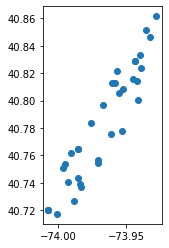

In [6]:
gdf.plot()

In [7]:
import folium

In [10]:
# Load map centred on Southern California
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10, control_scale=True)
 
# create a marker cluster for starbucks locations in Irvine
from folium import plugins
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

#Loop over the x and y coordinates from the geometry column in the 'gdf' geodataframe
for row in gdf.itertuples():
    folium.Marker(location=[row.geometry.y,row.geometry.x],popup=row.PD_DESC).add_to(marker_cluster)

m